Computer Vision 

## 0. Computer vision libraries in PyTorch

`torchvision`: base domain library
`torchvision.datasets` - get datasets and data loading functions for computer vision
`torchvision.models - get pretrained computer vision models
`torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
`torch.utils.data.Dataset` - Base dataset class for PyTorch
`torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [66]:
import torch
from torch import nn

# import torchvisoin
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matpllotlib for visualization
import matplotlib as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.3.1
0.18.1


## 1. Getting a dataset

We'll be using FasionMNIST from torchvision.MNIST

In [67]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train="True", # do we want the training dataset
    download="True", # do we want to download the data yes/no
    transform=ToTensor(), # how do we want to transform the data
    target_transform=None, # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train="False",
    download="True",
    transform=ToTensor(),
    target_transform=None,
)




In [68]:
len(train_data), len(test_data)

(60000, 60000)

In [69]:
# See first training data
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [70]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [71]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [72]:
# Check the input and output shapes of the data
print(f"image.shape: {image.shape} -> [color_channels, height, width]") # only one color channel becuase it is a Black and White image
print(f"Image label: {class_names[label]}")

image.shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shaope: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9 - Ankle boot')

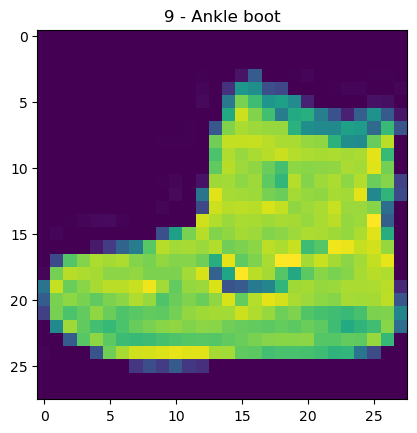

In [73]:
import matplotlib.pyplot as plt
inage, label = train_data[0]
print(f"Image shaope: {image.shape}")
plt.imshow(image.squeeze())
plt.title(f"{label} - {class_names[label]}")   
#image

(-0.5, 27.5, 27.5, -0.5)

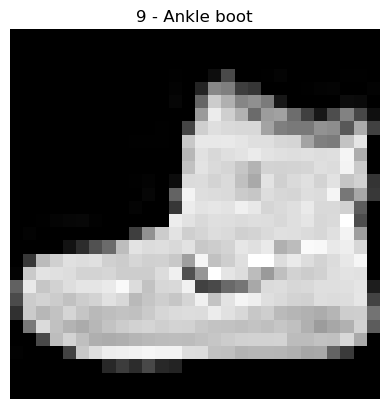

In [74]:
plt.imshow(image.squeeze(), cmap="gray") # grey scale
plt.title(f"{label} - {class_names[label]}")
plt.axis(False) # remove axis

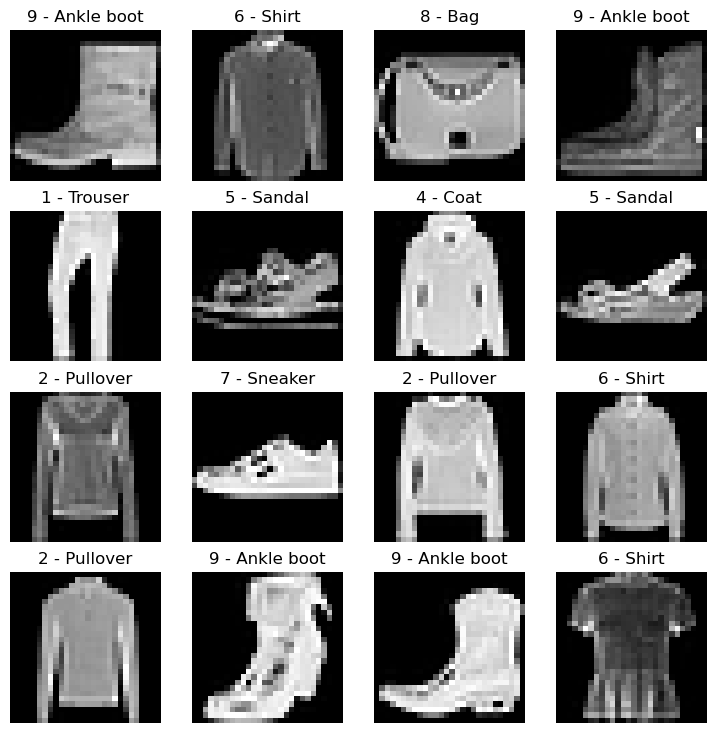

In [75]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"{label} - {class_names[label]}")
    plt.axis(False)
    

Do you think these images could be modeled with pure linear lines or will we need non-linearity?

# Prepare DataLoader

Right now  the data is in the form of PyToch tensors
Dataloader turns our dataset into a Python iterable

More specifically, we want to turn our data into batches (or mini-batches) 

Why would we want to do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update it's gradients per epoch. It will update every 32 images, vs every 60,000 if we did the full list each epoch. (Look up mini-batches gradient descent for more info)

In [76]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                                batch_size=BATCH_SIZE,
                                shuffle=False)
test_dataloader, train_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x16dda1c10>,
 <torch.utils.data.dataloader.DataLoader at 0x16d1b7050>)

In [77]:
# Let's checkout what we created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}") # Our model will see 1875 batches of 32 images
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x16d1b7050>, <torch.utils.data.dataloader.DataLoader object at 0x16dda1c10>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 1875 batches of 32


In [78]:
# Checkout what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape # [32 samples, 1 color channel, height, width], 32 labels

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label shape: torch.Size([])


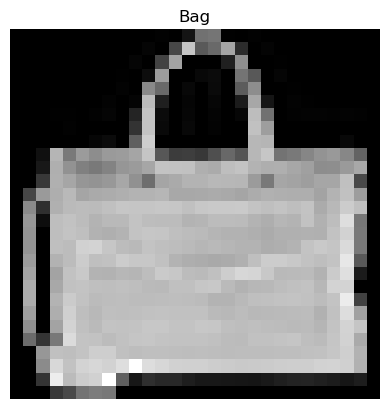

In [79]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label, = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray") # Squeeze the color channel
plt.title(f"{class_names[label]}")
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label shape: {label.shape}")


## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modeeling experiments, it's best to start with a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models/experiments

In other words: start simply and add complexity when necessary

In [80]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a cingle sample
x = train_features_batch[0]

output = flatten_model(x) # perform forward pass

# Print out wht happened
print(f"Shape before flatten: {x.shape} -> [color channels, height, width]")
print(f"Shape after flatten: {output.shape} -> [color channels * height * width]")

Shape before flatten: torch.Size([1, 28, 28]) -> [color channels, height, width]
Shape after flatten: torch.Size([1, 784]) -> [color channels * height * width]


In [81]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int,):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape), # in_features is the same as the out_features of the previous layer
        )

    def forward(self, x):
        return self.layer_stack(x)

In [82]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28x28 - Output of flatten needs to be input shape
    hidden_units=10, # How many units in the hidden layer
    output_shape=len(class_names) # one for every class
    
).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [83]:
dummy_x = torch.rand([1, 1, 28, 28])
print(model_0(dummy_x))
print(model_0(dummy_x).shape)
print(model_0.state_dict())

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])
OrderedDict([('layer_stack.1.weight', tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])), ('layer_stack.1.bias', tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
         0.0018,  0.0163])), ('layer_stack.2.weight', tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
          0.2019,  0.2847],
        [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.0118,
          0.0932, -0.18

# 3.1  Setup loss, optimizer, and evaluation metrics


* Loss function - since we're working with multiclass data, our loss function will be 'nn.CrossEntropyLoss'
* Optimizer - our optimizer willl be `torch.optim.SGD` for Stochastic Gradient Descent.
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evalauation metric

In [84]:

import requests
from pathlib import Path

# Download helper function from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py exists")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py exists


In [85]:
# Import accuracy metrric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)




### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll want to track are:
1. Model's performance (loss and accuracy values, etc)
2. How fast it runs



In [86]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    """
    Print out the training time given the start and end time.
    """
    print(f"Train time on {device}: {end - start:.3f} seconds")
    return end - start
    


In [87]:
start_time = timer()
## somt code...
end_time = timer()
print_train_time(start_time, end_time, device="CPU")

Train time on CPU: 0.000 seconds


8.167000487446785e-06

### 3.3 # Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss per batch
3. Loop through testing batches, perform testing steps, calculate the test loss per batch
4. Print out what's happening.

In [88]:
# Import tqdm for progress bars
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()
        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)
            ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 2.31847 | Test loss: 2.31847, Test acc: 11.07%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 2.31847 | Test loss: 2.31847, Test acc: 11.07%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 2.31847 | Test loss: 2.31847, Test acc: 11.07%

Train time on cpu: 9.936 seconds


# 4. Make predictions and get model 0 results


In [89]:

torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of the model predicting on data_loader"""
    loss, acc = 0., 0.
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions
            y_pred = model(X)
            
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                               y_pred=y_pred.argmax(dim=1))    
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate the model 0 results = 
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 2.3184683322906494,
 'model_acc': 11.071666666666667}

## 5. Setup device agnostic-code (for using the GPU if there is one)

In [90]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 6. Model 1: Building a better model with non-liearity

We learned about the power of non-linearity in Workbook_02


In [91]:

# Create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int,):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten into a single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(), # add a ReLU activation function
            nn.Linear(in_features=hidden_units, out_features=output_shape), # in_features is the same as the out_features of the previous layer
            nn.ReLU() # add a ReLU activation function
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [92]:
model_1 = FashionMNISTModelV1(
    input_shape=784, # this is 28x28
    hidden_units=10, # How many units in the hidden layer
    output_shape=len(class_names) # one for every class
    
).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [93]:
# Setup loss function and optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # Measure how wrong the model is
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1) # tries to update our models parameters to reduce the loss

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [101]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Performs training step with model traing to learn on data_loader"""
    train_loss, train_acc = 0., 0.
    
    # Put model in training mode
    model.train()
    
    # Put data on target device

    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        # 1. Forward pass (outputs the raw logits from the model)
        y_pred = model(X)

        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # from logits -> preidction labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [104]:
train_step(model=model_1,
           data_loader=train_dataloader,
           loss_fn=loss_fn,
           optimizer=optimizer,
           accuracy_fn=accuracy_fn,
           device=device)

Train loss: 0.64475 | Train acc: 76.21%


In [107]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,):
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # 1. Forward pass
            test_pred = model(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(data_loader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(data_loader)
            ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

In [108]:
test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)


Train loss: 0.67371 | Test loss: 0.66513, Test acc: 75.11%



In [105]:
# Calculate the model 0 results = 
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6651328206062317,
 'model_acc': 75.11333333333333}